<a href="https://colab.research.google.com/github/aufarfaiq/PCVK_Genap2023/blob/main/PC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 40
Masukkan nilai kontras: 0.5


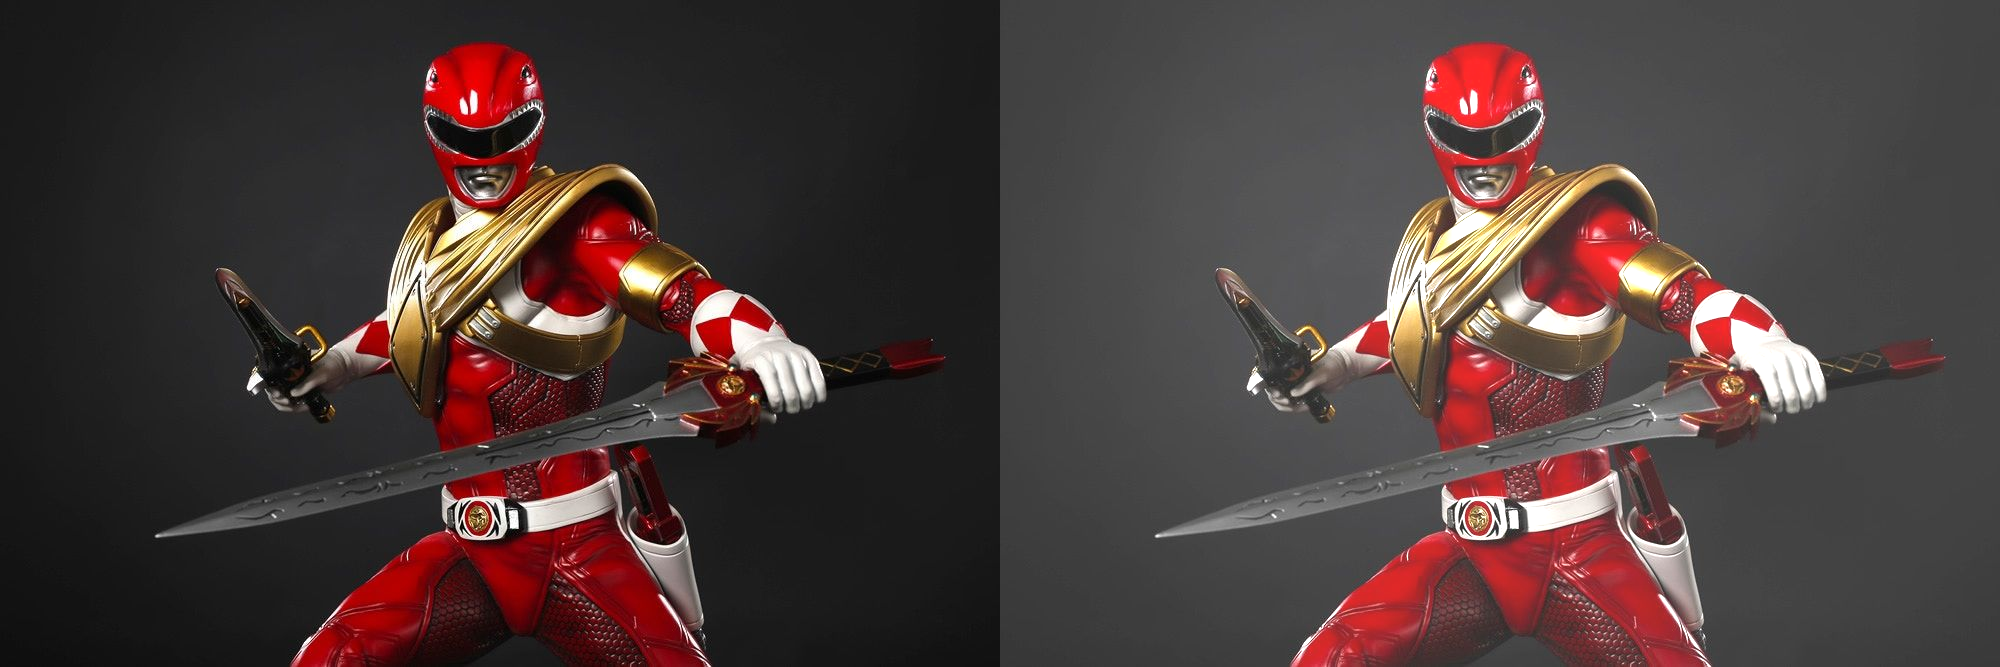

In [10]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = float(input('Masukan nilai kecerahan: '))
  contrast = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/foto.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c,] + brightness, 0, 255)

#cara simple tanpa for loop 

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 25


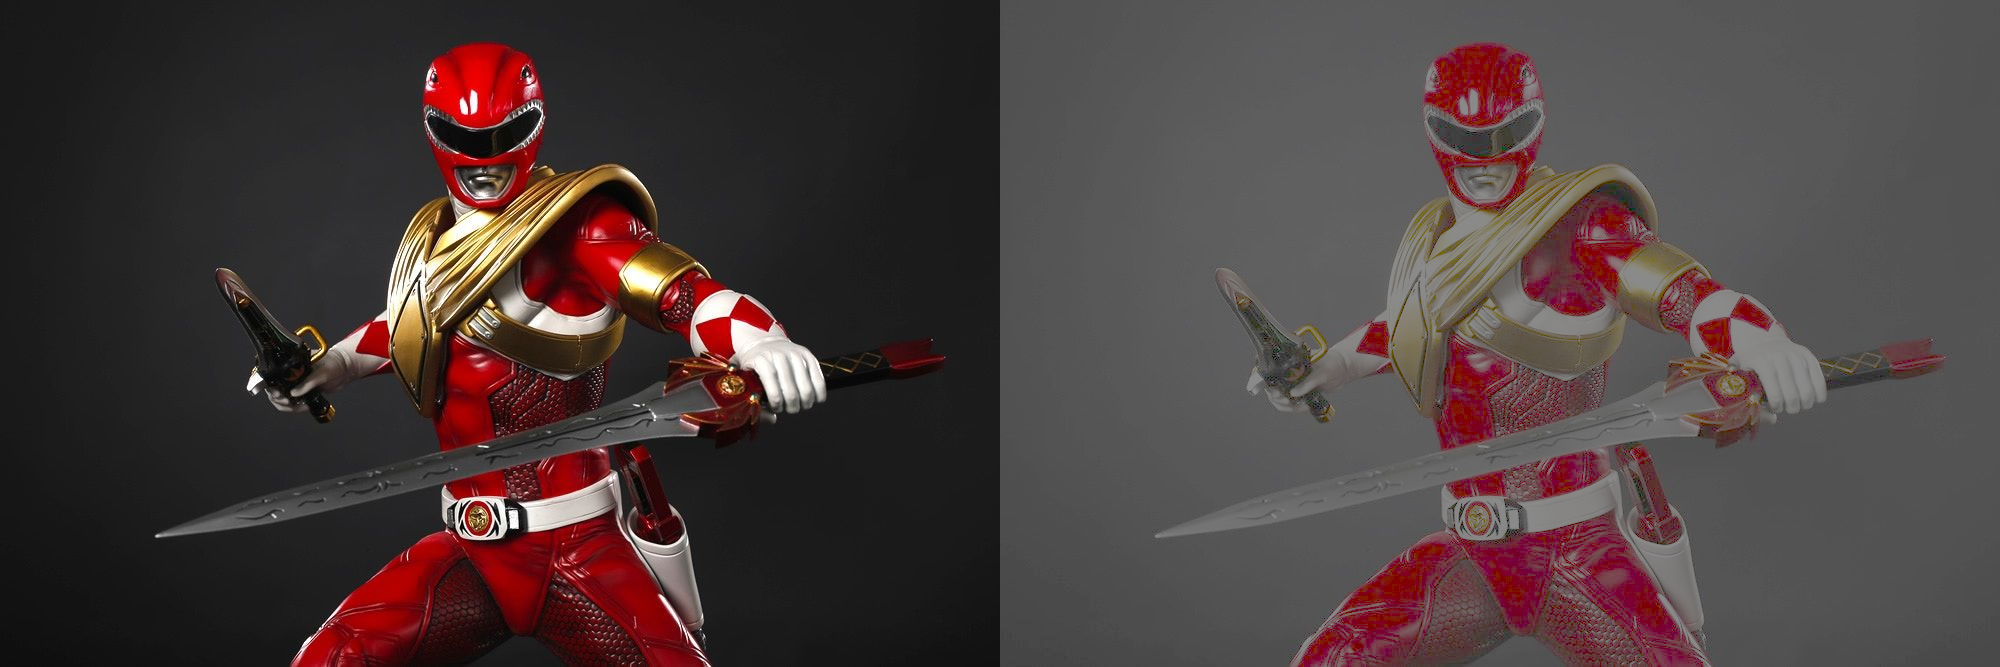

In [11]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/foto.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

### **AVERAGING**

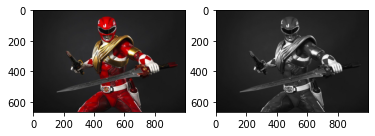

In [12]:
img = cv.imread('/content/drive/MyDrive/foto.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_avg = cv.imread('/content/drive/MyDrive/foto.jpg')
img_avg[:] = img.mean(axis=-1, keepdims=1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

### **LIGHTNESS**

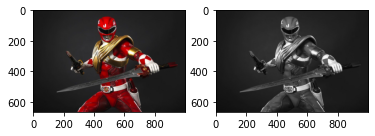

In [13]:
img = cv.imread('/content/drive/MyDrive/foto.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_lgh = cv.imread('/content/drive/MyDrive/foto.jpg')
img_lgh[:] = np.max(img_lgh,axis=-1,keepdims=10)/2+np.min(img_lgh,axis=-1,keepdims=10)/2

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lgh)

### **LUMINANCE**

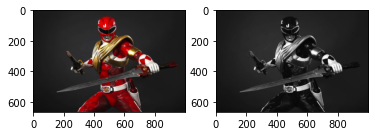

In [14]:
img = cv.imread('/content/drive/MyDrive/foto.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

image_lmc = cv.imread('/content/drive/MyDrive/foto.jpg')
R, G, B = image_lmc[:,:,0], image_lmc[:,:,1], image_lmc[:,:,2]

gray_image_lmc = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lmc, cmap='gray')

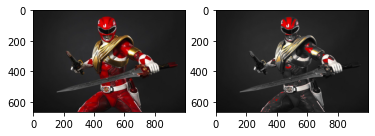

In [15]:
img = cv.imread('/content/drive/MyDrive/foto.jpg')

ret, mask = cv.threshold(img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(img_rgb, mask3)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')